In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

dataset_org = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
dataset = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

# stats
mean1 = dataset['RH'].mean()
sum1 = dataset['RH'].sum()
max1 = dataset['RH'].max()
min1 = dataset['RH'].min()
count1 = dataset['RH'].count()
median1 = dataset['RH'].median()
std1 = dataset['RH'].std()
var1 = dataset['RH'].var()
print('Mean value: ' + str(mean1))
print('Sum of value: ' + str(sum1))
print('Max value: ' + str(max1))
print('Min value: ' + str(min1))
print('Count of value: ' + str(count1))
print('Median value: ' + str(median1))
print('Std of value: ' + str(std1))
print('Var of value: ' + str(var1))

#wypełnij puste komórki medianą RH
dataset.RH.replace(-200, median1, inplace=True)


Mean value: 39.48537992946447
Sum of value: 369464.70000000007
Max value: 88.7
Min value: -200.0
Count of value: 9357
Median value: 48.6
Std of value: 51.2161449717661
Var of value: 2623.0935057689617


In [ ]:
def add_groupby(group):
    group['MeanRH'] = group['RH'].mean()
    return group

# dodanie kolumny ze srednia wartoscia RH dla kazdego dnia
dailyRH = dataset.groupby([pd.to_datetime(dataset.Date, format='%d/%m/%Y')])['RH'].mean()
dataset = dataset.groupby([pd.to_datetime(dataset.Date, format='%d/%m/%Y')]).apply(add_groupby)
#print('TEST', dataset)
#dailyRH.to_csv("test.csv", sep=';', decimal=',', header=['DailyRH'])
#dailyRH_df = pd.read_csv('test.csv', sep=';', decimal=',')

In [ ]:
# detect outliers IQR score
# przedzialy zostaly zwiekszone ze wzgledu na zbyt malo outliersow przy 25% i 75%
Q1 = dailyRH.quantile(.30)
Q3 = dailyRH.quantile(.70)
IQR = Q3-Q1
print(dailyRH.quantile(.30))
print(dailyRH.quantile(.70))
print("IQR", IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit:', low_lim)
print('up_limit:', up_lim)
outliers = []
for x in dailyRH:
    if x:
        if (x < low_lim) or (x > up_lim):
            outliers.append(x)
print('ilosc outliers:', len(outliers))

dataset.loc[(dataset.RH < low_lim) | (dataset.RH > up_lim), "outlier"] = "True"
dataset.loc[(dataset.RH >= low_lim) & (dataset.RH < up_lim), "outlier"] = "False"



41.4
55.58333333333334
IQR 14.183333333333344
low_limit: 20.124999999999982
up_limit: 76.85833333333336
ilosc outliers: 5


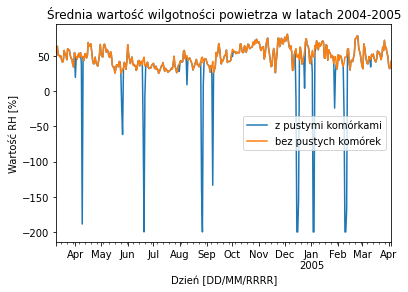

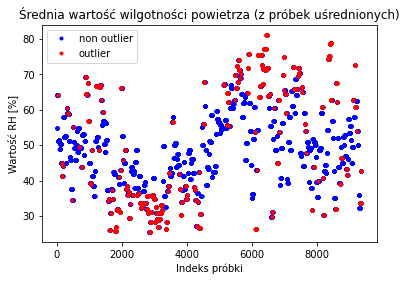

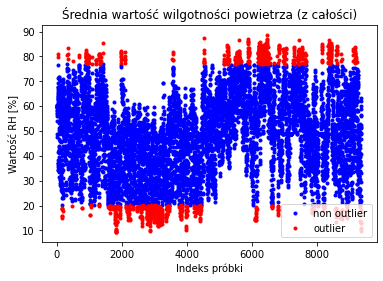

In [ ]:
# plot
#ax1 = dataset_org.plot(x='Date', y='RH')
#dataset.plot(x='Date', y='MeanRH', ax=ax1)
ax1 = dataset_org.groupby([pd.to_datetime(dataset.Date, format='%d/%m/%Y')])['RH'].mean().plot()
dataset.groupby([pd.to_datetime(dataset.Date, format='%d/%m/%Y')])['RH'].mean().plot(ax=ax1)
plt.title('Średnia wartość wilgotności powietrza w latach 2004-2005')
plt.legend(['z pustymi komórkami', 'bez pustych komórek'])
ax1.set_xlabel("Dzień [DD/MM/RRRR]")
ax1.set_ylabel("Wartość RH [%]")
plt.show()
# ax2 = dataset.plot(x='Date', y='RH')
#plt.title('Średnia wartość wilgotności powietrza w latach 2004-2005')
#ax2.set_xlabel("Dzień [DD/MM/RRRR]")
#ax2.set_ylabel("Wartość RH [%]")

# add index RH
dataset['index'] = dataset.index
#colors = np.where(dataset['outlier'] == "False", 'blue', 'red') #check outliers
#ax2 = dataset.loc[dataset['outlier'] == "False"].groupby([pd.to_datetime(dataset.Date, format='%d/%m/%Y')])['RH'].mean().plot(x='index', y='RH', c='blue', style='.')
#dataset.loc[dataset['outlier'] == "True"].groupby([pd.to_datetime(dataset.Date, format='%d/%m/%Y')])['RH'].mean().plot(x='index', y='RH', c='red', style='.', ax=ax2)
ax2 = dataset.loc[dataset['outlier'] == "False"].plot(x='index', y='MeanRH', c='blue', style='.')
dataset.loc[dataset['outlier'] == "True"].plot(x='index', y='MeanRH', c='red', style='.', ax=ax2)
plt.title('Średnia wartość wilgotności powietrza (z próbek uśrednionych)')
plt.legend(['non outlier', 'outlier'])
ax2.set_xlabel("Indeks próbki")
ax2.set_ylabel("Wartość RH [%]")

ax3 = dataset.loc[dataset['outlier'] == "False"].plot(x='index', y='RH', c='blue', style='.')
dataset.loc[dataset['outlier'] == "True"].plot(x='index', y='RH', c='red', style='.', ax=ax3)
plt.title('Średnia wartość wilgotności powietrza (z całości)')
plt.legend(['non outlier', 'outlier'])
ax3.set_xlabel("Indeks próbki")
ax3.set_ylabel("Wartość RH [%]")

plt.show()

min: -200.0  max:  44.6


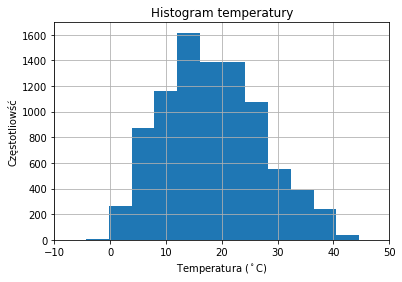

'histogram przedstawia rozklad czestotliwosci temperatury. Dane byly zbierane przez ponad rok, od 10/03/2004 do 04/04/2005 roku. \nMozna zauwazyc, ze w ciagu badanego roku temperatura nie schodzila ponziej -5 stopni Celsjusza, najwyzsza temperature jaka zanotowono to ok 45 st.\nNajczesciej mozna bylo zanotowac temperature od 12 do 16 stopni Celsjusza (ok. 1600 dni),co swiadczy o klimacie cieplym umiarkowanym, w ktorym wiekszosc czasu w ciagu roku jest cieplo. \nNajmniej pojawiajacymi sie wartosciami sa temperatury ujemne oraz powyzej 40 stopni, \n'

In [ ]:
# histogram
max2 = dataset['T'].max()
min2 = dataset['T'].min()
print('min:', min2, " max: ", max2)
median2 = dataset['T'].median()
dataset.T.replace(-200, median2, inplace=True)

dataset.hist(column='T', bins=60)
plt.title('Histogram temperatury')
plt.xlim([-10, 50.0])
plt.xlabel('Temperatura ($^\circ$C)')
plt.ylabel("Częstotliowść")
plt.show()


          RH         T
RH  1.000000 -0.108851
T  -0.108851  1.000000


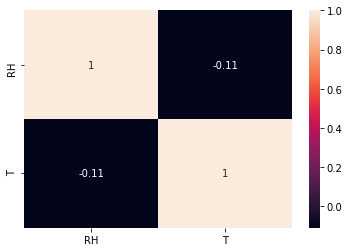

'Patrzac na macierz korelacji, wspolczynnik korelacji miedzy RH i T jest bardzo maly i wynosi ~ -0.11, \noznacza to, że na wartosc temperatury bardzo malo wplywa wilgotnosc powietrza. patrzac na wykres RH mozna zauwazyc,\nze przez caly okres pomiarow wilgotnosc jest praktycznie taka sama, jej srednia wychodzi ok 40%. \nW przypadku pory letniej(gdize temperatura byla najwyzsza) wilgotnosc spada do ok. 20-50%,\njednakze w przypadku reszty por, wilgotnosc wahala sie od 10 do 90, co znacznie wplywa na wynik korelacji.\n'

In [ ]:
#korelacja cechy RH i T
cor_df = pd.DataFrame(dataset, columns=['RH', 'T'])
macierz_korelacji = cor_df.corr()
print(macierz_korelacji)
sn.heatmap(macierz_korelacji, annot=True)
plt.show()


# save changes to csv
dataset.to_csv("cw4.csv", sep=';', decimal=',', index=False)

In [ ]:
%%shell
jupyter nbconvert --to html /content/ProstaAnalizaDanych.ipynb

[NbConvertApp] Converting notebook /content/ProstaAnalizaDanych.ipynb to html
[NbConvertApp] Writing 461382 bytes to /content/ProstaAnalizaDanych.html
